In [2]:
import os, glob
from astropy.io import fits
import matplotlib.pyplot as plt
from BreyoSpec import BreyoSpec

from speclite import resample
import numpy as np

%matplotlib inline

In [3]:
#files = "C:\\Users\\noahf\\Documents\\School\\Junior-Semester-1\\ObsAstro\\2021-11-03\\duringTransitOutput\\WASP-93b-2a_20211104T010459.fit"
postTransit = '/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/'
postTransitPaths = glob.glob(postTransit+"*")

duringTransit = '/home/ubuntu/Documents/ObsAstro/Data/duringTransitOutput/'
transitPaths = glob.glob(duringTransit+"*")

jupPath = '/home/ubuntu/Documents/ObsAstro/Data/Jupiter_20211109T005343.fit'

In [4]:
combSpec = BreyoSpec(transitPaths) # combined spectrum
hostSpec = BreyoSpec(postTransitPaths) # host star spectrum
jupSpec = BreyoSpec(jupPath)

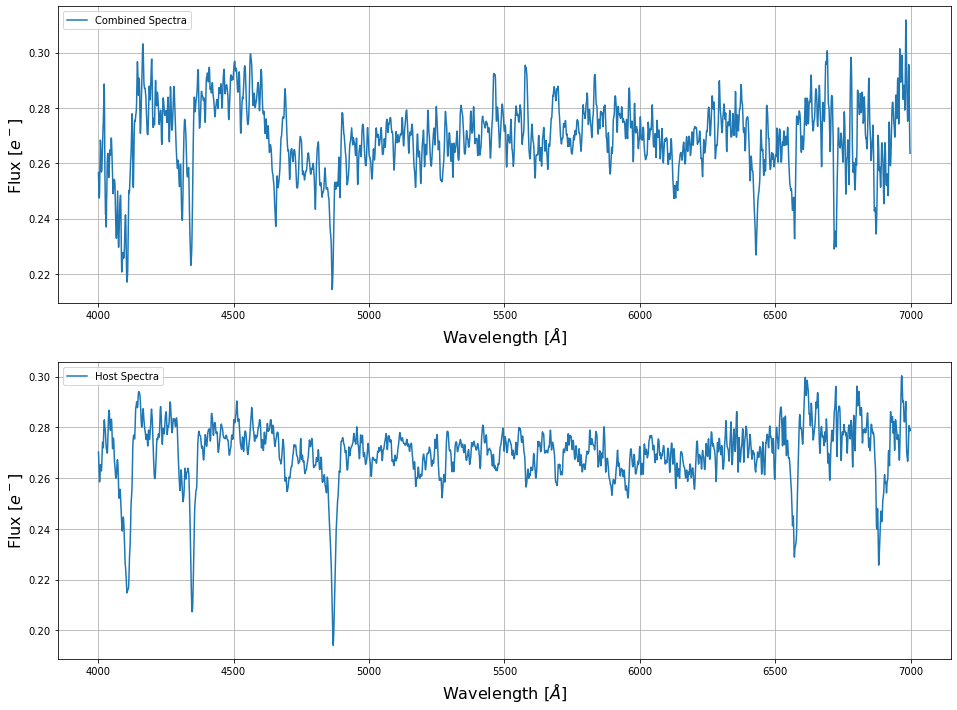

In [5]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,12))

combSpec.plot(ax=ax1, label='Combined Spectra')
hostSpec.plot(ax=ax2, label='Host Spectra')

ax1.legend()
ax2.legend();

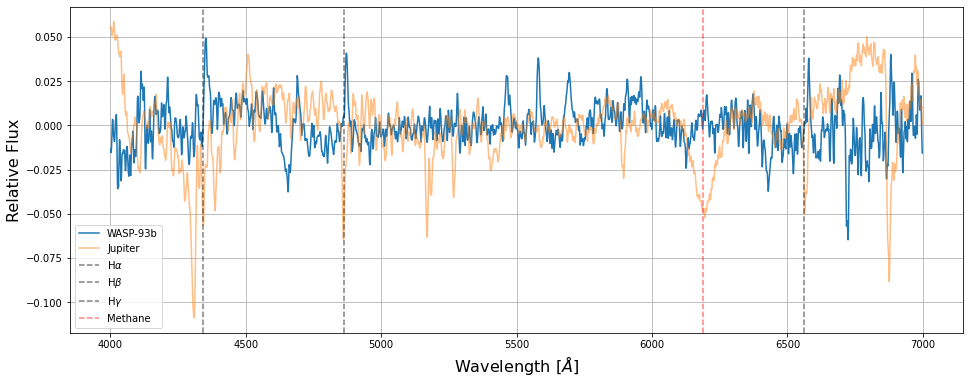

In [6]:
exoFlux = combSpec.flux - hostSpec.flux
wave = combSpec.wave

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(wave, exoFlux, label="WASP-93b")
ax.plot(jupSpec.wave, jupSpec.flux - np.mean(jupSpec.flux), alpha=0.5, label="Jupiter")

ax.axvline( 6562.8, color='k', linestyle='--', label=r'H$\alpha$', alpha=0.5)
ax.axvline( 4861.3, color='k', linestyle='--', label=r'H$\beta$', alpha=0.5)
ax.axvline( 4340.4, color='k', linestyle='--', label=r'H$\gamma$', alpha=0.5)
ax.axvline( 6190, color='r', linestyle='--', label=r'Methane', alpha=0.5)

ax.set_xlabel('Wavelength [$\AA$]', fontsize=16)
ax.set_ylabel('Relative Flux', fontsize=16)
ax.grid()
ax.legend();